# classify the Size_Categorie using SVM

month	month of the year: 'jan' to 'dec'
day	day of the week: 'mon' to 'sun'
FFMC	FFMC index from the FWI system: 18.7 to 96.20
DMC	DMC index from the FWI system: 1.1 to 291.3
DC	DC index from the FWI system: 7.9 to 860.6
ISI	ISI index from the FWI system: 0.0 to 56.10
temp	temperature in Celsius degrees: 2.2 to 33.30
RH	relative humidity in %: 15.0 to 100
wind	wind speed in km/h: 0.40 to 9.40
rain	outside rain in mm/m2 : 0.0 to 6.4
Size_Categorie 	the burned area of the forest ( Small , Large)

In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns


In [2]:
forestfires = pd.read_csv("C:\\Excelr Data\\Assignments\\Support Vector Machines\\forestfires.csv")
forestfires

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,...,0,0,0,0,0,0,0,0,0,large
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,...,0,0,0,0,0,0,0,0,0,large
514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,...,0,0,0,0,0,0,0,0,0,large
515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,...,0,0,0,0,0,0,0,0,0,small


In [3]:
forestfires.drop(["month","day"],axis=1,inplace=True)

In [4]:
forestfires.head()


,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,1,...,0,0,0,0,1,0,0,0,0,small
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,0,...,0,0,0,0,0,0,0,1,0,small
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,0,...,0,0,0,0,0,0,0,1,0,small
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,1,...,0,0,0,0,1,0,0,0,0,small
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,0,...,0,0,0,0,1,0,0,0,0,small


In [5]:
forestfires.describe()


,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,...,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292,0.164410,...,0.017408,0.038685,0.003868,0.061896,0.032882,0.104449,0.003868,0.001934,0.029014,0.332689
std,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818,0.371006,...,0.130913,0.193029,0.062137,0.241199,0.178500,0.306138,0.062137,0.043980,0.168007,0.471632
min,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [6]:
forestfires.columns


Index(['FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain', 'area',
       'dayfri', 'daymon', 'daysat', 'daysun', 'daythu', 'daytue', 'daywed',
       'monthapr', 'monthaug', 'monthdec', 'monthfeb', 'monthjan', 'monthjul',
       'monthjun', 'monthmar', 'monthmay', 'monthnov', 'monthoct', 'monthsep',
       'size_category'],
      dtype='object')

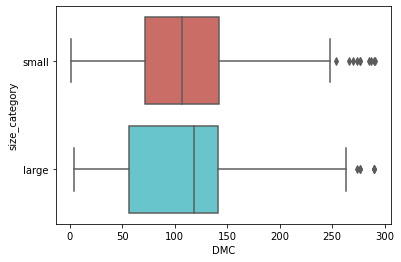

In [7]:
sns.boxplot(x="DMC",y="size_category",data=forestfires,palette = "hls")


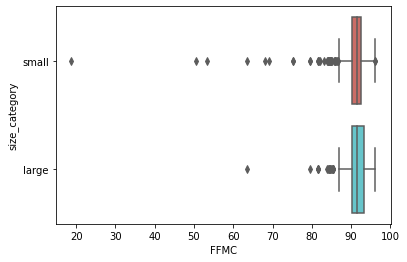

In [8]:
sns.boxplot(x="FFMC",y="size_category",data=forestfires,palette = "hls")


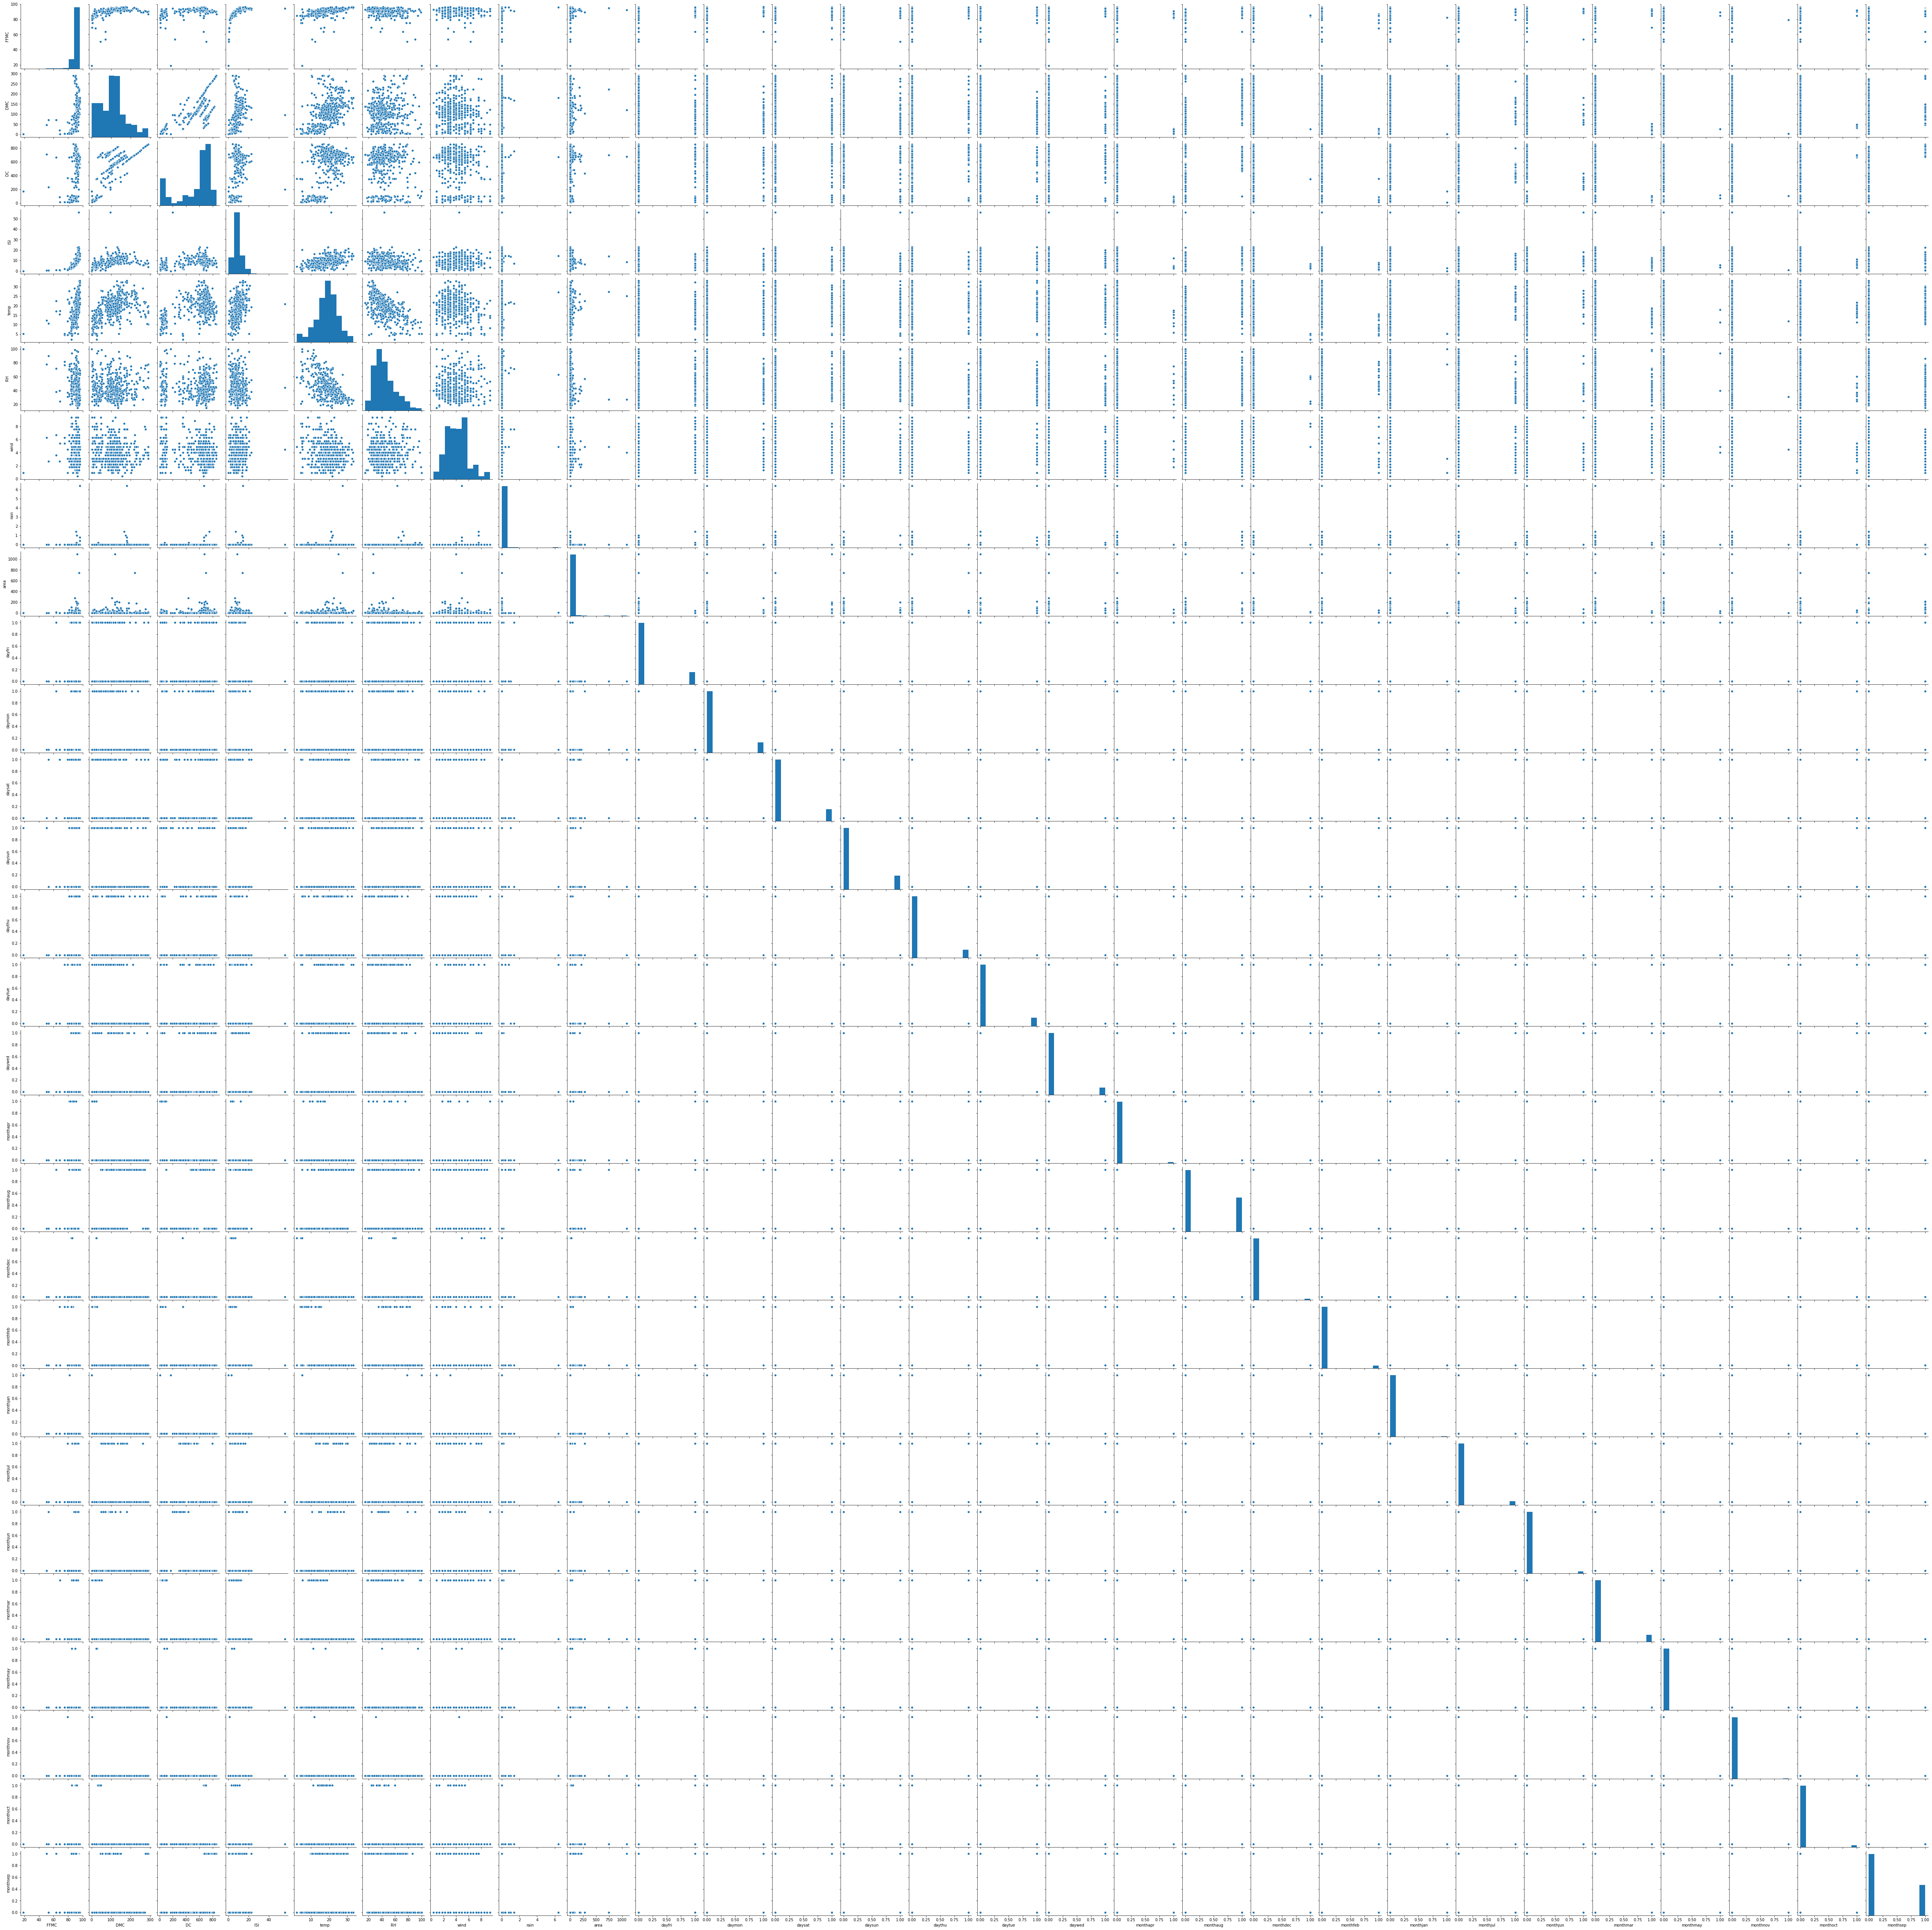

In [9]:
sns.pairplot(data=forestfires)


In [10]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

In [11]:
train,test = train_test_split(forestfires,test_size = 0.3,random_state=0)


In [12]:
test.head()


,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
213,87.6,52.2,103.8,5.0,11.0,46,5.8,0.0,27.35,0,...,0,0,0,0,1,0,0,0,0,large
435,90.8,84.7,376.6,5.6,23.8,51,1.8,0.0,0.00,0,...,0,0,1,0,0,0,0,0,0,small
343,91.5,130.1,807.1,7.5,15.9,51,4.5,0.0,2.18,0,...,0,0,0,0,0,0,0,0,1,small
230,92.9,133.3,699.6,9.2,26.4,21,4.5,0.0,88.49,0,...,0,0,0,0,0,0,0,0,1,large
171,85.6,90.4,609.6,6.6,17.4,50,4.0,0.0,2.69,0,...,0,0,0,0,0,0,0,0,0,small


In [13]:
train_X = train.iloc[:,:28]# 28 th column is target variable
train_X

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
390,84.7,9.5,58.3,4.1,7.5,71,6.3,0.0,9.96,0,...,0,1,0,0,0,0,0,0,0,0
5,92.3,85.3,488.0,14.7,22.2,29,5.4,0.0,0.00,0,...,0,0,0,0,0,0,0,0,0,0
141,95.5,99.9,513.3,13.2,23.3,31,4.5,0.0,0.55,0,...,0,0,0,0,0,0,0,0,0,0
268,92.1,152.6,658.2,14.3,21.0,32,3.1,0.0,0.00,0,...,0,0,0,0,0,0,0,0,0,0
135,93.5,139.4,594.2,20.3,17.6,52,5.8,0.0,0.00,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70,91.2,48.3,97.8,12.5,15.8,27,7.6,0.0,0.00,1,...,0,0,0,0,0,1,0,0,0,0
277,85.4,25.4,349.7,2.6,4.6,21,8.5,0.0,10.73,0,...,1,0,0,0,0,0,0,0,0,0
9,92.5,88.0,698.6,7.1,22.8,40,4.0,0.0,0.00,0,...,0,0,0,0,0,0,0,0,0,1
359,92.5,122.0,789.7,10.2,21.1,39,2.2,0.0,8.12,1,...,0,0,0,0,0,0,0,0,0,1


In [30]:
train_y = train.iloc[:,28]
train_y

390    large
5      small
141    small
268    small
135    small
       ...  
70     small
277    large
9      small
359    large
192    large
Name: size_category, Length: 361, dtype: object

In [31]:
test_X  = test.iloc[:,:28]
test_X

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
213,87.6,52.2,103.8,5.0,11.0,46,5.8,0.0,27.35,0,...,0,0,0,0,0,1,0,0,0,0
435,90.8,84.7,376.6,5.6,23.8,51,1.8,0.0,0.00,0,...,0,0,0,1,0,0,0,0,0,0
343,91.5,130.1,807.1,7.5,15.9,51,4.5,0.0,2.18,0,...,0,0,0,0,0,0,0,0,0,1
230,92.9,133.3,699.6,9.2,26.4,21,4.5,0.0,88.49,0,...,0,0,0,0,0,0,0,0,0,1
171,85.6,90.4,609.6,6.6,17.4,50,4.0,0.0,2.69,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26,92.4,117.9,668.0,12.2,19.0,34,5.8,0.0,0.00,1,...,0,0,0,0,0,0,0,0,0,1
208,92.4,117.9,668.0,12.2,19.6,33,6.3,0.0,19.23,1,...,0,0,0,0,0,0,0,0,0,1
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00,0,...,0,0,0,0,0,1,0,0,0,0
331,91.2,124.4,795.3,8.5,21.5,28,4.5,0.0,15.64,0,...,0,0,0,0,0,0,0,0,0,1


In [32]:
test_y  = test.iloc[:,28]
test_y

213    large
435    small
343    small
230    large
171    small
       ...  
26     small
208    large
4      small
331    large
196    large
Name: size_category, Length: 156, dtype: object

## Create SVM classification object 

# 'linear', 'poly', 'rbf', 'sigmoid', 'precomputed'

# kernel = linear


In [34]:
#help(SVC)
model_linear = SVC(kernel = "linear")
model_linear

SVC(kernel='linear')

In [35]:
model_linear.fit(train_X,train_y)


SVC(kernel='linear')

In [37]:
pred_test_linear = model_linear.predict(test_X)
pred_test_linear

array(['large', 'small', 'small', 'large', 'small', 'small', 'small',
       'small', 'large', 'small', 'small', 'large', 'large', 'small',
       'large', 'small', 'small', 'large', 'small', 'large', 'small',
       'small', 'small', 'small', 'large', 'large', 'small', 'small',
       'small', 'small', 'small', 'small', 'small', 'large', 'large',
       'large', 'small', 'small', 'large', 'small', 'large', 'small',
       'small', 'small', 'small', 'small', 'large', 'small', 'small',
       'small', 'small', 'large', 'small', 'large', 'large', 'small',
       'small', 'small', 'large', 'large', 'small', 'small', 'large',
       'large', 'large', 'large', 'small', 'small', 'small', 'large',
       'large', 'small', 'small', 'small', 'small', 'small', 'small',
       'small', 'large', 'small', 'small', 'small', 'small', 'small',
       'small', 'large', 'small', 'large', 'small', 'small', 'large',
       'large', 'small', 'small', 'small', 'small', 'small', 'small',
       'small', 'sma

In [38]:
np.mean(pred_test_linear==test_y) 


0.9871794871794872

In [39]:
# Kernel = poly
model_poly = SVC(kernel = "poly")
model_poly

SVC(kernel='poly')

In [40]:
model_poly.fit(train_X,train_y)


SVC(kernel='poly')

In [41]:
pred_test_poly = model_poly.predict(test_X)
pred_test_poly

array(['small', 'small', 'small', 'large', 'small', 'small', 'small',
       'small', 'small', 'small', 'small', 'small', 'small', 'small',
       'small', 'small', 'small', 'small', 'small', 'small', 'small',
       'small', 'small', 'small', 'large', 'small', 'small', 'small',
       'small', 'small', 'small', 'small', 'small', 'small', 'small',
       'large', 'small', 'small', 'large', 'small', 'small', 'small',
       'small', 'small', 'small', 'small', 'small', 'small', 'small',
       'small', 'small', 'small', 'small', 'small', 'small', 'small',
       'small', 'small', 'small', 'small', 'small', 'small', 'small',
       'small', 'small', 'large', 'small', 'small', 'small', 'small',
       'small', 'small', 'small', 'small', 'small', 'small', 'small',
       'small', 'small', 'small', 'small', 'small', 'small', 'small',
       'small', 'small', 'small', 'small', 'small', 'small', 'small',
       'large', 'small', 'small', 'small', 'small', 'small', 'small',
       'small', 'sma

In [42]:
np.mean(pred_test_poly==test_y) 


0.7564102564102564

In [44]:
# kernel = rbf
model_rbf = SVC(kernel = "rbf")
model_rbf

SVC()

In [45]:
model_rbf.fit(train_X,train_y)


SVC()

In [46]:
pred_test_rbf = model_rbf.predict(test_X)
pred_test_rbf 

array(['small', 'small', 'small', 'small', 'small', 'small', 'small',
       'small', 'small', 'small', 'small', 'small', 'small', 'small',
       'small', 'small', 'small', 'small', 'small', 'small', 'small',
       'small', 'small', 'small', 'small', 'small', 'small', 'small',
       'small', 'small', 'small', 'small', 'small', 'small', 'small',
       'large', 'small', 'small', 'small', 'small', 'small', 'small',
       'small', 'small', 'small', 'small', 'small', 'small', 'small',
       'small', 'small', 'small', 'small', 'small', 'small', 'small',
       'small', 'small', 'small', 'small', 'small', 'small', 'small',
       'small', 'small', 'large', 'small', 'small', 'small', 'small',
       'small', 'small', 'small', 'small', 'small', 'small', 'small',
       'small', 'small', 'small', 'small', 'small', 'small', 'small',
       'small', 'small', 'small', 'small', 'small', 'small', 'small',
       'large', 'small', 'small', 'small', 'small', 'small', 'small',
       'small', 'sma

In [47]:
np.mean(pred_test_rbf==test_y) 


0.7243589743589743